## Eigen Values and Eigen Vectors

In [8]:
import numpy as np

In [9]:
""" 
For a square matrix 𝐴, an eigenvector v and its eigenvalue λ satisfy: 

                𝐴v = λv
                
v shows the direction that doesn’t change under the transformation 𝐴.

λ shows how much the vector v is stretched or shrunk.

"""

A = np.array([[4, 2],
              [1, 3]])

eig_vals, eig_vecs = np.linalg.eig(A)
print("Eigenvalues:", eig_vals)
print()
print("Eigenvectors:", eig_vecs)
print()

# Verify A v = λ v for each eigenvector
for i in range(len(eig_vals)):
    lhs = A @ eig_vecs[:, i]
    rhs = eig_vals[i] * eig_vecs[:, i]
    print(f"Check {i+1}: ", np.allclose(lhs, rhs))


Eigenvalues: [5. 2.]

Eigenvectors: [[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]

Check 1:  True
Check 2:  True


## Spectral Theory Basics

In [10]:
"""
Any symmetric matrix A can be decomposed as: 

                A=QΛQ^T
                
Where :
-> Q is an orthogonal matrix whose columns are the eigenvectors of A, 
-> Λ is a diagonal matrix with the eigenvalues of A on the diagonal.

"""

# Spectral decomposition (only works for symmetric matrices)
A_symmetric = np.array([[2, 1],
                        [1, 2]])

eigenvalues, eigenvectors = np.linalg.eigh(A_symmetric)

# Reconstruct A using spectral theorem
A_reconstructed = eigenvectors @ np.diag(eigenvalues) @ eigenvectors.T

print("Original matrix A:\n", A_symmetric)
print()
print("Eigenvalues:", eigenvalues)
print()
print("Eigenvectors:\n", eigenvectors)
print()
print("Reconstructed A:\n", A_reconstructed)


Original matrix A:
 [[2 1]
 [1 2]]

Eigenvalues: [1. 3.]

Eigenvectors:
 [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]

Reconstructed A:
 [[2. 1.]
 [1. 2.]]


## PCA (Principal Component Analysis) Basics

PCA reduces data dimensions using eigenvalues & eigenvectors of the covariance matrix.

Steps :

* Standardize data

* Compute covariance matrix

* Find eigenvalues & eigenvectors

* Select top eigenvectors → principal components

In [11]:
X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0],
              [2.3, 2.7],
              [2, 1.6],
              [1, 1.1],
              [1.5, 1.6],
              [1.1, 0.9]])

# Step 1: Standardize data

X_meaned = X - np.mean(X, axis=0)

# Step 2: Covariance matrix

cov_mat = np.cov(X_meaned, rowvar=False)

# Step 3: Eigenvalues & eigenvectors of covariance matrix

eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

# Step 4: Sort eigenvalues in descending order

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Project data onto principal components

X_pca = X_meaned @ eigenvectors[:, :2]  # Keep top 2 PC's

print("Covariance Matrix:\n", cov_mat)
print()
print("Eigenvalues:\n", eigenvalues)
print()
print("Principal Components (Eigenvectors):\n", eigenvectors)
print()
print("Data after PCA:\n", X_pca)


Covariance Matrix:
 [[0.61655556 0.61544444]
 [0.61544444 0.71655556]]

Eigenvalues:
 [0.0490834  1.28402771]

Principal Components (Eigenvectors):
 [[-0.6778734  -0.73517866]
 [-0.73517866  0.6778734 ]]

Data after PCA:
 [[-0.82797019 -0.17511531]
 [ 1.77758033  0.14285723]
 [-0.99219749  0.38437499]
 [-0.27421042  0.13041721]
 [-1.67580142 -0.20949846]
 [-0.9129491   0.17528244]
 [ 0.09910944 -0.3498247 ]
 [ 1.14457216  0.04641726]
 [ 0.43804614  0.01776463]
 [ 1.22382056 -0.16267529]]


# Visualisation of PCA and Eigen Vectors

In [13]:
!pip install matplotlib
import matplotlib.pyplot as plt

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 4.2 MB/s eta 0:00:02
   --- ------------------------------------ 0.8/8.1 MB 3.4 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/8.1 MB 2.1 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.1 MB 2.3 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.1 MB 2.4 MB/s eta 0:00:03
   ---------------- ----------------------- 3.4/8.1 MB 2.9 MB/s eta 0:00:02
   --------------------- ------------------ 4.5/8.1 MB 3.1 MB/s eta 0:00:02
   --------------------------- ------------ 5.5/8.1 MB 3.4 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.1 MB 3.4 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.1 MB 3.5 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 3.4 MB/s eta 0:00:01
   ----------------------------


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


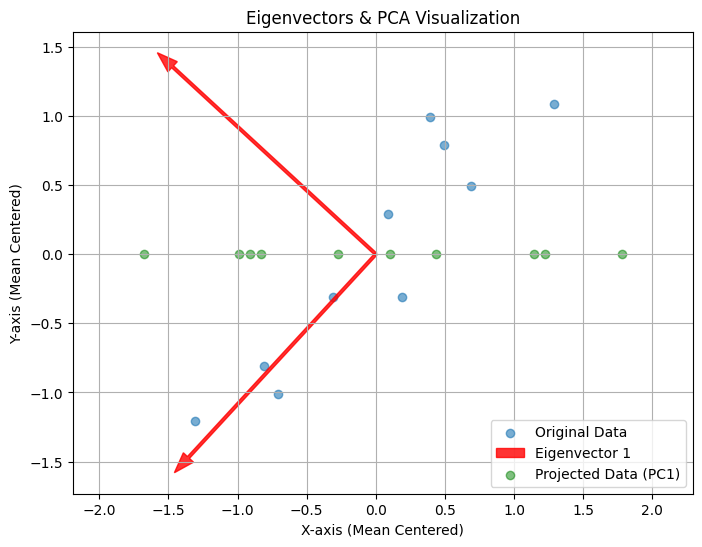

: 

In [ ]:

X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0],
              [2.3, 2.7],
              [2, 1.6],
              [1, 1.1],
              [1.5, 1.6],
              [1.1, 0.9]])

# Step 1: Mean-center the data

X_meaned = X - np.mean(X, axis=0)

# Step 2: Covariance matrix

cov_mat = np.cov(X_meaned, rowvar=False)

# Step 3: Eigenvalues & eigenvectors

eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

# Sort by eigenvalues in descending order

idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Step 4: Project data onto principal components (top 2)

X_pca = X_meaned @ eigenvectors

# Step 5: Plot original data

plt.figure(figsize=(8,6))
plt.scatter(X_meaned[:, 0], X_meaned[:, 1], alpha=0.6, label="Original Data")

# Plot eigenvectors (scaled for visualization)

for i in range(len(eigenvalues)):
    vec = eigenvectors[:, i]
    plt.arrow(0, 0, vec[0]*2, vec[1]*2, 
              color='r', width=0.02, head_width=0.1, alpha=0.8,
              label=f"Eigenvector {i+1}" if i==0 else None)

# PCA axes projection (optional visualization)

plt.scatter(X_pca[:,0], np.zeros_like(X_pca[:,0]), 
            color='g', alpha=0.5, label="Projected Data (PC1)")

plt.xlabel("X-axis (Mean Centered)")
plt.ylabel("Y-axis (Mean Centered)")
plt.title("Eigenvectors & PCA Visualization")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()
